In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss

## 1 
- Загрузите данные о пассажирских авиаперевозках и визуализируйте временной ряд, чтобы оценить его стационарность. На графике обратите внимание на наличие тренда, сезонных колебаний или изменяющейся дисперсии.
- Примените тест Дики-Фуллера (ADF) и определите, является ли ряд стационарным или нет. Какое значение p-value вы получили при применении теста АDF(округлите до 2 знака после запятой)?
- Примените тест KPSS и определите, является ли ряд стационарным или нет. Какое значение p-value вы получили при применении теста KPSS(округлите до 2 знака после запятой)?

In [2]:
df = pd.read_csv('../data/03-1-airline-passengers.csv')
df.set_index('Month', inplace=True)

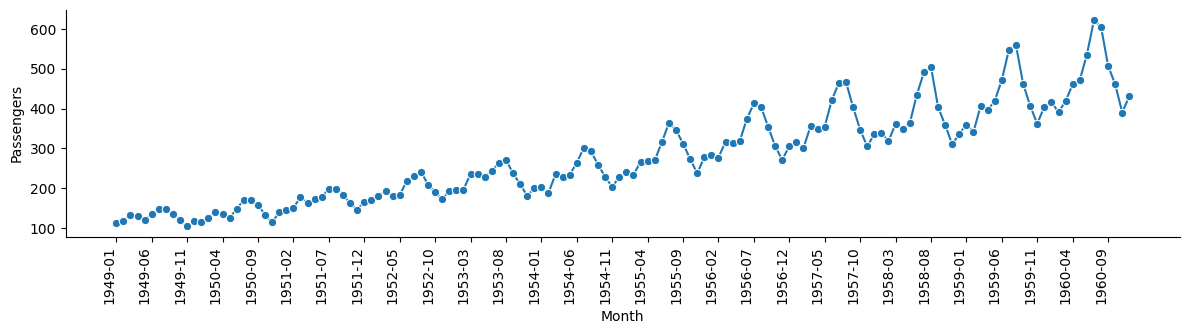

In [3]:
g = sns.relplot(x=df.index, y=df['Passengers'], kind='line', height=3, aspect=4, marker='o')
g.set_xticklabels(rotation=90, horizontalalignment="right", step=5);

In [63]:
# Тест Дики-Фуллера
result = adfuller(df['Passengers'].dropna())
print(f"p-value: {result[1]}")
if result[1] < 0.05:
	print("Ряд стационарен.")
else:
	print("Ряд нестационарен.")

p-value: 0.9918802434376411
Ряд нестационарен.


In [64]:
# Тест KPSS
result = kpss(df['Passengers'].dropna(), regression='c')
print(f"p-value: {result[1]}")
if result[1] > 0.05:
	print("Ряд стационарен.")
else:
	print("Ряд нестационарен.")

p-value: 0.01
Ряд нестационарен.


/var/folders/wb/4g8jd0z5523_swmb10tb_k7c0000gn/T/ipykernel_3215/1586889814.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['Passengers'].dropna(), regression='c')


## 2 
- Загрузите временной ряд данных о ежедневных ценах на нефть (например, WTI)
- Примените скользящее среднее с окном в 30 дней для удаления тренда. 
- Постройте графики исходного и преобразованного ряда.
- Определите, является ли временной ряд стационарным или нестационарным, используя графический метод (график) и статистический тест (ADF тест). Для этого используйте данные о ценах на нефть (WTI).
- Примените разностное преобразование для данных о ценах на нефть и постройте график разностей.
- Примените разностное преобразование для сезонных данных о ценах на нефть (например, период сезонности — 12 дней). Постройте график после сезонной разности.
- Проверьте стационарность временного ряда цен на нефть с помощью теста ADF (Augmented Dickey-Fuller) до и после преобразования ряда.Изменилась ли стационарность ряда?

In [24]:
df = pd.read_csv('../data/03-2-wti-daily.csv', parse_dates=['Date'], index_col='Date')

In [38]:
df['DiffRolling30Mean'] = df['Price'] - df['Price'].rolling(window=30).mean()
df['Diff1'] = df['Price'].diff(periods=1)
df['Diff12'] = df['Price'].diff(periods=12)
df.sample(5)

,Price,DiffRolling30Mean,Diff1,Diff5,Diff12
Date,,,,,
2016-09-09,45.88,1.160333,-1.75,-1.66,-1.66
1996-07-01,21.48,0.726667,0.56,1.45,1.45
1992-09-21,21.91,0.250333,-0.05,0.22,0.22
1994-08-31,17.60,-1.068000,0.20,-0.64,-0.64
2004-01-15,33.61,0.890333,-1.01,0.62,0.62


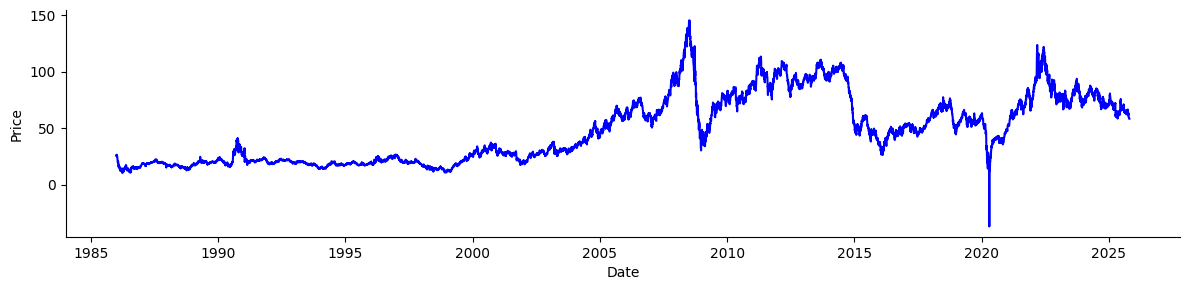

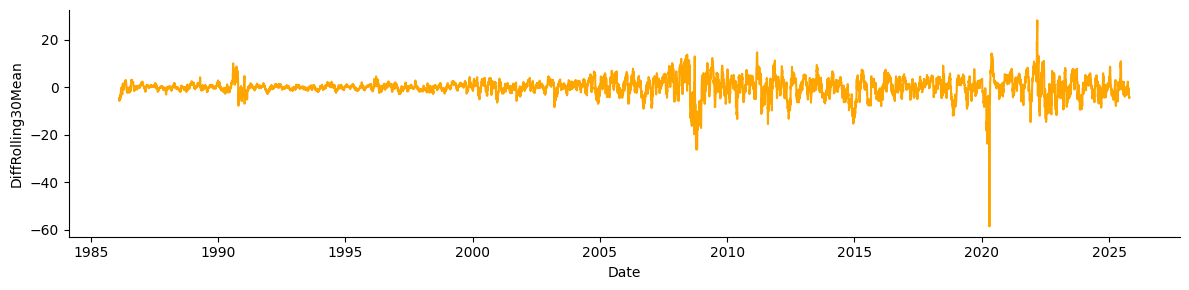

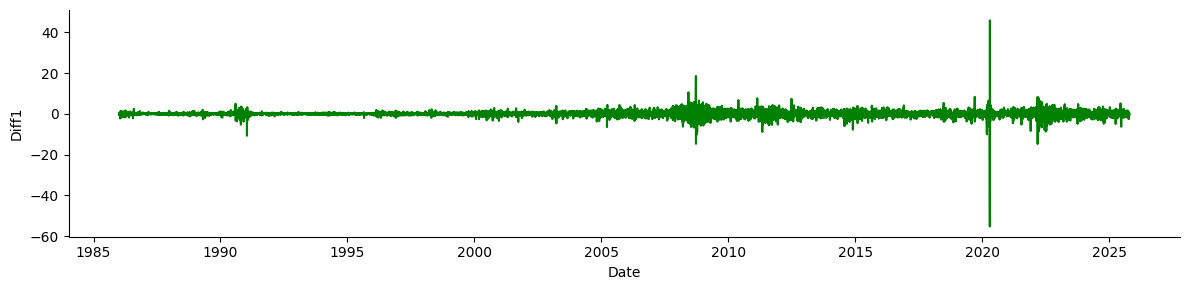

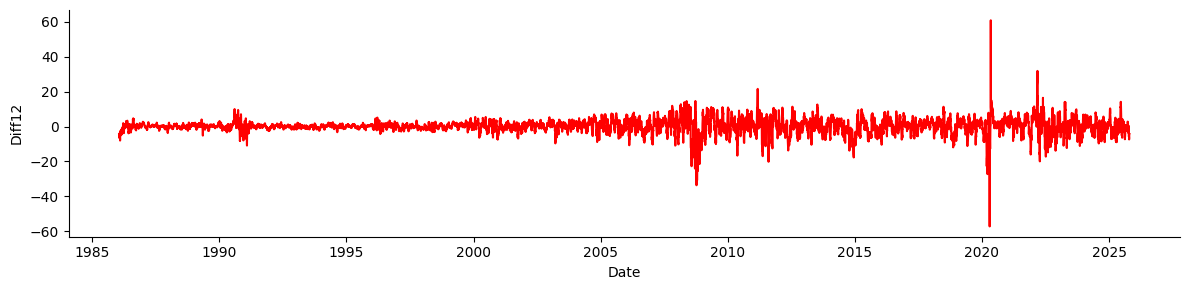

In [39]:
[sns.relplot(x=df.index, y=df[col], kind='line', height=3, aspect=4, color=color) 
 for col, color in [('Price', 'blue'), ('DiffRolling30Mean', 'orange'), ('Diff1', 'green'), ('Diff12', 'red')]];

In [41]:
# Тест Дики-Фуллера
check = lambda value: 'стационарен.' if value < 0.05 else 'нестационарен.'

result_raw = adfuller(df['Price'].dropna())
result_roll = adfuller(df['DiffRolling30Mean'].dropna())
result_diff_1 = adfuller(df['Diff1'].dropna())
result_diff_12 = adfuller(df['Diff12'].dropna())

print(
    f'Исходный ряд {check(result_raw[1])}\n'
    f'DiffRolling30Mean {check(result_roll[1])}\n'
    f'Diff1Day {check(result_diff_1[1])}\n'
    f'Diff12Day {check(result_diff_12[1])}'
  )

Исходный ряд нестационарен.
DiffRolling30Mean стационарен.
Diff1Day стационарен.
Diff12Day стационарен.
